<a href="https://colab.research.google.com/github/aayush1693/Sign-Language-Recognition-System/blob/main/Sign_Language_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sign Language Recognition System using TensorFlow in Python**


---


The first step of any machine learning problem is finding the appropriate dataset. For Sign language recognition let’s use the Sign Language MNIST dataset. It has images of signs corresponding to each alphabet in the English language. Since the sign language of J and Z requires motion, those two classes are not available in the dataset.

Importing Libraries

---


Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.




*   Pandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go
*   Numpy – Numpy arrays are very fast and can perform large computations in a very short time.
*   Matplotlib – This library is used to draw visualizations.
*   Tensorflow – This is an open-source library that is used for Machine Learning and Artificial intelligence and provides a range of functions to achieve complex functionalities with single lines of code.







In [ ]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

Importing Dataset

---


The dataset is available as two CSV files, sign_mnist_train.csv and sign_mnist_test.csv. Each row in the CSV file is a training sample with the 0th index having the labels from 0-25 and the rest of the row containing the 784-pixel values of a 28 x 28 image. Each pixel value will be in the range [0, 255].

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sign_mnist_train.csv')
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Data Loading and Preprocessing

---


The dataset has been provided in two files one is for training and the other one is for testing. We will load this data and then one hot encode the labels considering the fact we are not building the classifier for ‘J’ and ‘Z’ alphabet.

In [ ]:
def load_data(path):
	df = pd.read_csv(path)
	y = np.array([label if label < 9
				else label-1 for label in df['label']])
	df = df.drop('label', axis=1)
	x = np.array([df.iloc[i].to_numpy().reshape((28, 28))
				for i in range(len(df))]).astype(float)
	x = np.expand_dims(x, axis=3)
	y = pd.get_dummies(y).values

	return x, y

X_train, Y_train = load_data('/content/drive/MyDrive/sign_mnist_train.csv')
X_test, Y_test = load_data('/content/drive/MyDrive/sign_mnist_test.csv')

Now let’s check the shape of the training and the testing data.

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(27455, 28, 28, 1) (27455, 24)
(7172, 28, 28, 1) (7172, 24)


Data Visualization

---


In this section, we will try to visualize images for signs of some of the alphabets which have been provided to us to build the classifier for each class.

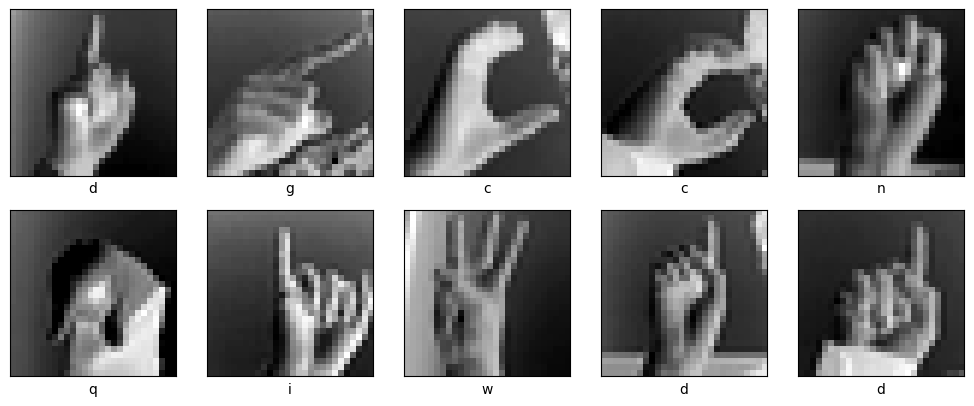

In [ ]:
class_names = list(string.ascii_lowercase[:26].replace(
	'j', '').replace('z', ''))

plt.figure(figsize=(10, 10))
for i in range(10):
	plt.subplot(5, 5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
	plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])
plt.tight_layout()
plt.show()


Model Development

---
From this step onward we will use the TensorFlow library to build our CNN model. Keras framework of the tensor flow library contains all the functionalities that one may need to define the architecture of a Convolutional Neural Network and train it on the data.

Model Architecture

We will implement a Sequential model which will contain the following parts:

*   Three Convolutional Layers followed by MaxPooling Layers.
*   The Flatten layer to flatten the output of the convolutional layer.
*   Then we will have two fully connected layers followed by the output of the flattened layer.
*   We have included some BatchNormalization layers to enable stable and fast training and a Dropout layer before the final layer to avoid any possibility of overfitting.
*   The final layer is the output layer which outputs soft probabilities for the 24 classes.



In [ ]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(filters=32,
						kernel_size=(3, 3),
						activation='relu',
						input_shape=(28, 28, 1)),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Conv2D(filters=64,
						kernel_size=(3, 3),
						activation='relu'),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Flatten(),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(256, activation='relu'),
	tf.keras.layers.Dropout(0.3),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(24, activation='softmax')
])

Let’s print the summary of the model’s architecture:

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1600)                │           6,400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │           6,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 442,264 (1.69 MB)

 Trainable params: 438,552 (1.67 MB)

 Non-trainable params: 3,712 (14.50 KB)

While compiling a model we provide these three essential parameters:
*   optimizer – This is the method that helps to optimize the cost function by using gradient descent.
*   loss – The loss function by which we monitor whether the model is improving with training or not.
*   metrics – This helps to evaluate the model by predicting the training and the validation data.



In [25]:
model.compile(
	optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy']
)

Now we will train our model:

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Create an ImageDataGenerator instance for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the train generator
train_generator = train_datagen.flow(
    X_train,
    Y_train,
    batch_size=32)

# Define the validation generator
val_generator = val_datagen.flow(
    X_test,
    Y_test,
    batch_size=32)

# Now you can fit the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=1)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step - accuracy: 0.6384 - loss: 1.2511 - val_accuracy: 0.8490 - val_loss: 0.5293
Epoch 2/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9513 - loss: 0.1670 - val_accuracy: 0.9115 - val_loss: 0.2773
Epoch 3/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9750 - loss: 0.0890 - val_accuracy: 0.7810 - val_loss: 0.9659
Epoch 4/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 47s 54ms/step - accuracy: 0.9812 - loss: 0.0661 - val_accuracy: 0.9189 - val_loss: 0.2624
Epoch 5/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9818 - loss: 0.0603 - val_accuracy: 0.9314 - val_loss: 0.2292


Model Evaluation

Let’s visualize the training and validation accuracy with each epoch.

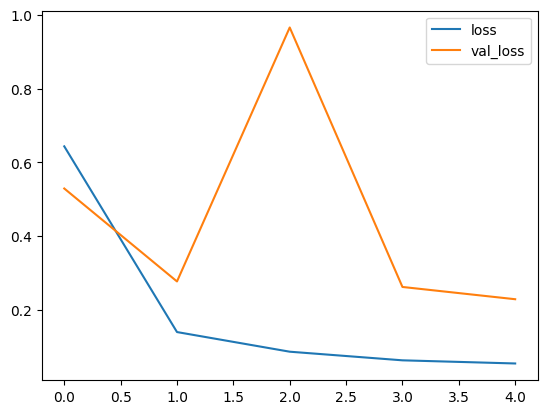

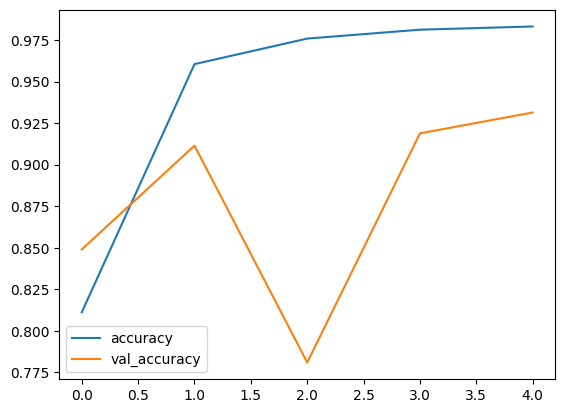

In [37]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [38]:
model.evaluate(val_generator)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9293 - loss: 0.2286


[0.22916080057621002, 0.9313998818397522]

# Conclusion:

---


By using just a simple CNN model we are able to achieve an accuracy of 92% which is really great. This shows that this technology is certainly going to help us build some amazing applications which can be proved a really great tool for people with some special needs.